# Prediction using Supervised ML 

## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.


In [30]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math
plt.rc("font", size=14)

%matplotlib inline



In [31]:
stu=pd.read_csv('student_scores.csv')
stu.head(8)

Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
5    1.5      20
6    9.2      88
7    5.5      60

In [32]:
#1 Checking the dimension of the student scores dataframe
stu.shape

(25, 2)

In [33]:
#2 Checking the data structure and also if there is missing value in any row in the data frame
stu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [34]:
#missing data
total = stu.isnull().sum().sort_values(ascending=False)
percent = (stu.isnull().sum()/stu.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

Total  Percent
Scores      0      0.0
Hours       0      0.0

In [35]:
stu.columns

Index(['Hours', 'Scores'], dtype='object')

## DESCRIPTIVE STATISTICS

In [36]:
stu.describe()

Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000

### (1) HOURS
**Observations**

- 25 students pertake in the examination
- The minimum hours students used in studying was 1.1 hour per day
- The maximum hours students used in studying was 9.2 hour per day
- The average hours students used in studying was 5.012 hours per day
- While the deviation is of 2.525 hours per day

### (2) SCORES
**Observations**

- 25 students pertake in the examination
- The minimum scores of students in the examination was 17
- The maximum scores of students in the examination was 95 
- The average scores of students in the examination was 51.48
- While the deviation is of 25.287


C:\Users\user\Downloads\Compressed\jj\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


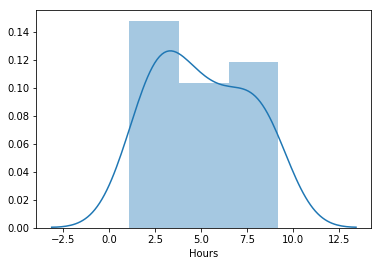

In [37]:
# univariate plot of hours spent on reading by students
sb.distplot(stu['Hours']);

C:\Users\user\Downloads\Compressed\jj\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


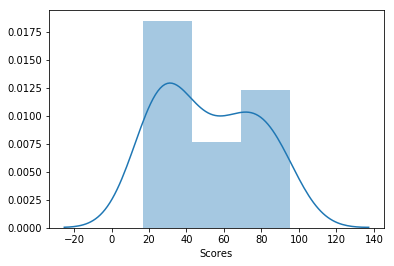

In [38]:
# univariate plot of students scores
sb.distplot(stu['Scores']);

### LINEARITY ASSUMPTION

**Check the individual relationship of the individual independent variable on the dependent variable**

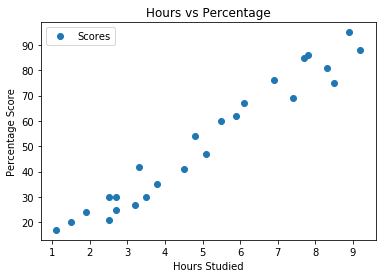

In [39]:
# Plotting the distribution of scores
stu.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**This graph shows the association between percentage of marks and the hours spent reading. This scatter plot clearly indicate that there is a positively linear relationship between percentage of marks and the hours spent reading.** 

In [40]:
#I am converting numerical variable to categorical variable using pandas' cut function
stu['grade']=pd.cut(stu.Scores,[0,39,69,100],labels=['poor', 'good', 'excellent'])
stu['grade'].head()

0         poor
1         good
2         poor
3    excellent
4         poor
Name: grade, dtype: category
Categories (3, object): [poor < good < excellent]

### DATA EXPLORATION

In [41]:
#Checking the overall counts of students scores categorising them into grades in the dataset
pd.DataFrame(stu.grade.value_counts())

grade
poor          10
good           8
excellent      7

In [42]:
stu.grade=stu.grade.astype('category')

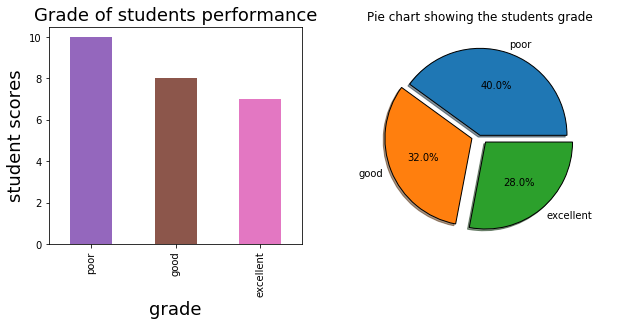

In [43]:
#Plotting the grade on a bar chart
plt.figure(figsize=(10,4))
plt.subplot(1,2,1);
stu.grade.value_counts().plot(kind='bar',color=['C4','C5','C6']);
plt.title('Grade of students performance',fontsize=18)
plt.xlabel('grade',fontsize=18)
plt.ylabel('student scores',fontsize=18);

plt.subplot(1,2,2);
grade_values=[10,8,7]
grade_labels=["poor","good","excellent"]
plt.axis("equal")
plt.title("Pie chart showing the students grade")
plt.pie(grade_values,labels=grade_labels,radius=1.0,autopct='%0.1f%%',shadow=True,explode=[0,0.1,0.1],wedgeprops={'edgecolor':'black'});

In [44]:
numeric_vars = ['Hours', 'Scores']
categoric_vars = ['grade']

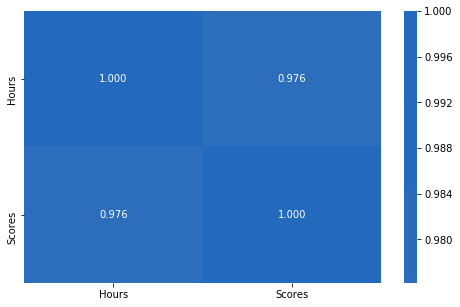

In [45]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(stu[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

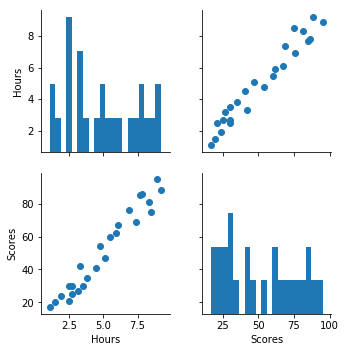

In [46]:
# plot matrix: checking relationship between the numerical variables in the dataset

g = sb.PairGrid(data = stu, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

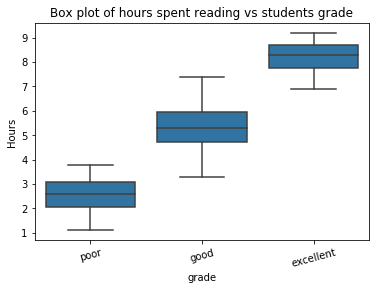

In [47]:
#Plotting a box plots for relationship between quantitative(hours spent reading) and qualitative variable(grade)
base_color=sb.color_palette()[0]
sb.boxplot(data=stu,x='grade',y='Hours',color=base_color);
plt.xticks(rotation=15)
plt.title('Box plot of hours spent reading vs students grade');

## MODEL DEVELOPMENT

# **MODEL ONE**

In [48]:
#Make a copy of the dataset
df_stu=stu.copy()

In [49]:
X = pd.DataFrame(df_stu['Hours'])
y = pd.DataFrame(df_stu['Scores'])

In [50]:
from sklearn.model_selection import train_test_split  
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

from sklearn import metrics 

In [51]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(20, 1)
(5, 1)
(20, 1)
(5, 1)


In [52]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  


In [53]:
reg.fit(X_train, y_train) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
print('Intercept:' , reg.intercept_)
print('Coefficients:', reg.coef_)

Intercept: [-1.53695733]
Coefficients: [[10.46110829]]


### **Regression Line**


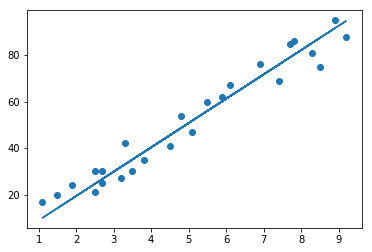

In [55]:
# Plotting the regression line
line = reg.coef_*X+reg.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [56]:
y_pred = reg.predict(X_test) # Predicting the scores
print(y_pred)

[[ 9.97026179]
 [32.98470004]
 [18.33914843]
 [87.38246316]
 [48.67636248]]


In [57]:
y_test

Scores
14      17
13      42
17      24
3       75
21      54

In [58]:
# You can also test with your own data
hours = 9.25
own_pred = reg.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = [95.22829438]


# **MODEL TWO**

In [61]:
import statsmodels.api as sm # import statsmodels 

X = pd.DataFrame(df_stu['Hours'])
y = pd.DataFrame(df_stu['Scores'])
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Wed, 02 Dec 2020   Prob (F-statistic):           9.13e-17
Time:                        15:27:40   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.337      -2.753       7.721
Hours          9.7758      0.453     21.583      0.000       8.839      10.713
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.137
Skew:                          -0.216   Prob(JB):                        0.343
Kurtosis:                       1.634   Cond. No.                         13.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**1- The coefficient for Hours spent reading is 9.7758, and its corresponding p-value is very low, almost 0. That means the coefficient is statistically significant.**

**2- R-squared value is 0.953, which means that 95.3% of the Scores variance can be explained by the hours spent reading.**

**3- Prob F-statistic has a very low p-value, practically zero, which gives us that the model fit is statistically significant.**


### Making Predictions based on the Regression Results
**Recall that the equation for the Simple Linear Regression is:**

Y = Bo + B1X1

So for our example, it would look like this:

Score = (const coef) + (Hours)*X1 

**And this is how the equation would look like once we plug the coefficients:**

Score = (2.4837) + (9.7758)*X1 

#### **Question**
**What will be predicted score if a student studies for 9.25 hrs/ day?**


Hours = 9.25 (i.e., X1= 9.25)

**When you plug those numbers you’ll get:**

Score = (2.4837) + (9.7758)*X1 

Score = (2.4837) + (9.7758)*9.25  = 92.865

The predicted/estimated value for the Score a student will get in an examination if he/she studies for 9.25 is therefore 92.865.



In [62]:
# Try to predict the y ( balance) for the test data-features(independentvariables(x_test))
predictions=reg.predict(X_test)

In [63]:
# Accuracy of the prediction
confidence = reg.score(X_test, y_test)
print("This is predicted Values",predictions)
print("This is the prediction accuracy",confidence)

This is predicted Values [[ 9.97026179]
 [32.98470004]
 [18.33914843]
 [87.38246316]
 [48.67636248]]
This is the prediction accuracy 0.8421031525243527


In [66]:
prediction = model.predict(X)
print(prediction)

0     26.923182
1     52.340271
2     33.766244
3     85.578002
4     36.698985
5     17.147378
6     92.421065
7     56.250592
8     83.622842
9     28.878343
10    77.757360
11    60.160913
12    46.474789
13    34.743825
14    13.237057
15    89.488324
16    26.923182
17    21.057700
18    62.116074
19    74.824618
20    28.878343
21    49.407530
22    39.631726
23    69.936717
24    78.734940
dtype: float64


In [73]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': df_stu['Scores'], 'Predicted': prediction})  
df 

Actual  Predicted
0       21  26.923182
1       47  52.340271
2       27  33.766244
3       75  85.578002
4       30  36.698985
5       20  17.147378
6       88  92.421065
7       60  56.250592
8       81  83.622842
9       25  28.878343
10      85  77.757360
11      62  60.160913
12      41  46.474789
13      42  34.743825
14      17  13.237057
15      95  89.488324
16      30  26.923182
17      24  21.057700
18      67  62.116074
19      69  74.824618
20      30  28.878343
21      54  49.407530
22      35  39.631726
23      76  69.936717
24      86  78.734940

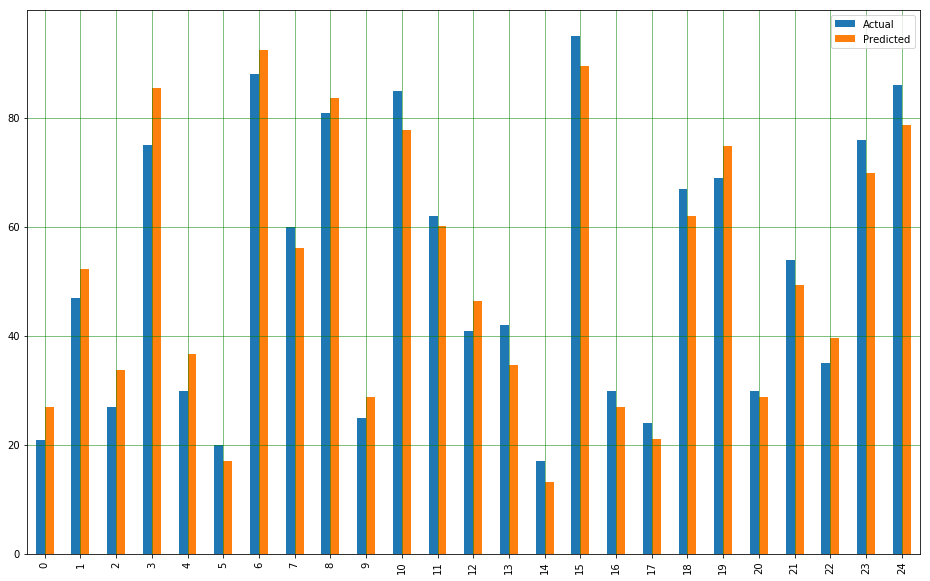

In [74]:
df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

**Though our model is not very precise, the predicted percentages are close to the actual ones.**

**LINE OF BEST FIT**

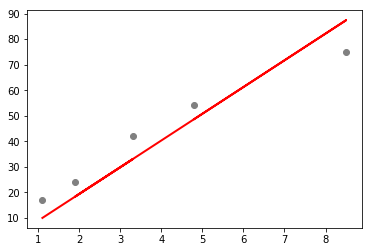

In [75]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

**Since there is just a little deviation from the line, we have a good fit. So there is no major deviation from normality.**

## PERFORMANCE OF THE METRICS

The final step is to evaluate the performance of the algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For regression algorithms, three evaluation metrics are commonly used:

In [76]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 7.882398086270432
Mean Squared Error: 68.88092074277635
Root Mean Squared Error: 8.299453038771674


# CONCLUSION

**A simple regression was put to predict score of a student in an examination from their hours spent studying. Hours spent studying statistically significantly predicted score of a student in an examination: F(1,25) = 465.8, p(0.001) < 0.05, Adjusted R-squared= 0.951. Predicted score is equal to (2.4837) + (9.7758)*X1.**